In [5]:
import sys
import os

#code_folder_path = os.path.abspath(os.path.join(os.getcwd(), ".."))
##sys.path.append(code_folder_path)
#code_folder_path
from _Setup import *

In [7]:
state_data = pd.read_csv("C:\AA-Capstone\Data\Border_State_Data.csv", header = 0)


<>:1: SyntaxWarning: invalid escape sequence '\A'
<>:1: SyntaxWarning: invalid escape sequence '\A'
C:\Users\super\AppData\Local\Temp\ipykernel_27872\3101342727.py:1: SyntaxWarning: invalid escape sequence '\A'
  state_data = pd.read_csv("C:\AA-Capstone\Data\Border_State_Data.csv", header = 0)


In [8]:
state_data.head(5)

,Fiscal Year,Month Grouping,Month (abbv),Land Border Region,State,Demographic,Citizenship,Title of Authority,Encounter Count
0,2022,FYTD,DEC,Northern Land Border,AK,Single Adults,CANADA,Title 8,3
1,2022,FYTD,DEC,Northern Land Border,ID,Single Adults,CANADA,Title 8,6
2,2022,FYTD,DEC,Northern Land Border,ID,Single Adults,"CHINA, PEOPLES REPUBLIC OF",Title 8,1
3,2022,FYTD,DEC,Northern Land Border,ID,Single Adults,OTHER,Title 8,2
4,2022,FYTD,DEC,Northern Land Border,ME,Accompanied Minors,CANADA,Title 42,1


As expected, our data runs from 2020 to the present day. 2025 (FYTD - Fiscal Year to Date). We'll probably just treat this as 2025, and change it

In [9]:
state_data['Fiscal Year'].unique() 

array(['2022', '2023', '2024', '2025 (FYTD)', '2020', '2021'],
      dtype=object)

Month Grouping has an unclear definition in their Data Dictionary. 

In [10]:
state_data['Month Grouping'].unique()

array(['FYTD', 'Remaining'], dtype=object)

In [29]:
state_data

,Fiscal Year,Month Grouping,Month (abbv),Land Border Region,State,Demographic,Citizenship,Title of Authority,Encounter Count
0,2022,FYTD,DEC,Northern Land Border,AK,Single Adults,CANADA,Title 8,3
1,2022,FYTD,DEC,Northern Land Border,ID,Single Adults,CANADA,Title 8,6
2,2022,FYTD,DEC,Northern Land Border,ID,Single Adults,"CHINA, PEOPLES REPUBLIC OF",Title 8,1
3,2022,FYTD,DEC,Northern Land Border,ID,Single Adults,OTHER,Title 8,2
4,2022,FYTD,DEC,Northern Land Border,ME,Accompanied Minors,CANADA,Title 42,1
...,...,...,...,...,...,...,...,...,...
57775,2021,FYTD,SEP,Southwest Land Border,TX,UC / Single Minors,NICARAGUA,Title 8,161
57776,2021,FYTD,SEP,Southwest Land Border,TX,UC / Single Minors,OTHER,Title 8,29
57777,2021,FYTD,SEP,Southwest Land Border,TX,UC / Single Minors,PERU,Title 8,9
57778,2021,FYTD,SEP,Southwest Land Border,TX,UC / Single Minors,TURKEY,Title 8,4


In [30]:
remaining = state_data[state_data["Month Grouping"] == "Remaining"]

In [35]:
remaining["Month (abbv)"].unique()

array(['APR', 'AUG', 'FEB', 'JAN', 'JUL', 'JUN', 'MAR', 'MAY', 'SEP'],
      dtype=object)

In [21]:
state_data['Month (abbv)'].unique()

array(['DEC', 'NOV', 'OCT', 'APR', 'AUG', 'FEB', 'JAN', 'JUL', 'JUN',
       'MAR', 'MAY', 'SEP'], dtype=object)

In [11]:
len(state_data['State'].unique())


48

No encounters in Iowa or West Virginia. The other 48 states, however, do.

In [12]:
state_data['State'].unique()

array(['AK', 'ID', 'ME', 'MI', 'MN', 'MT', 'ND', 'NY', 'OH', 'VT', 'WA',
       'AL', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'GU', 'HI',
       'IL', 'LA', 'MA', 'MD', 'MP', 'MS', 'NC', 'NJ', 'NV', 'OR', 'PA',
       'PR', 'RI', 'SC', 'TN', 'TX', 'UT', 'VA', 'VI', 'NM', 'MO', 'NH',
       'WI', 'KY', 'IN', 'OK'], dtype=object)

In [13]:
authority_df = state_data[["Title of Authority", "Encounter Count"]]

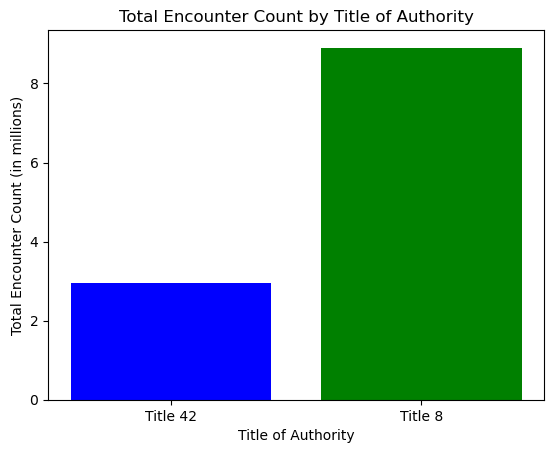

In [22]:
agg_authority = authority_df.groupby("Title of Authority", as_index =False).sum()

plt.bar(agg_authority['Title of Authority'], agg_authority['Encounter Count']/1000000, color=['blue', 'green'])
plt.xlabel('Title of Authority')
plt.ylabel('Total Encounter Count (in millions)')
plt.title('Total Encounter Count by Title of Authority')
plt.ticklabel_format(style='plain', axis='y')  # Remove scientific notation
plt.show()



In [20]:
agg_authority

,Title of Authority,Encounter Count
0,Title 42,2960908
1,Title 8,8904261


In [78]:
month_map = {
    'JAN': 1, 'FEB': 2, 'MAR': 3, 'APR': 4, 'MAY': 5, 'JUN': 6,
    'JUL': 7, 'AUG': 8, 'SEP': 9, 'OCT': 10, 'NOV': 11, 'DEC': 12
}

In [79]:
state_data['Fiscal Year'] = state_data['Fiscal Year'].str.replace(r'\s*\(FYTD\)', '', regex=True)

state_data['Adjusted Fiscal Year'] = state_data.apply(
    lambda row: str(int(row['Fiscal Year']) - 1) if month_map[row['Month (abbv)']] in [10, 11, 12] else row['Fiscal Year'],
    axis=1
)

# Create 'MonthDate' column by combining fiscal year and month
state_data['MonthDate'] = pd.to_datetime(state_data['Adjusted Fiscal Year'] + '-' + state_data['Month (abbv)'].map(month_map).astype(str), format='%Y-%m')

In [86]:
print(state_data["MonthDate"].min())
print(state_data["MonthDate"].max())

2019-10-01 00:00:00
2024-12-01 00:00:00


In [80]:
twenty = state_data[state_data["Fiscal Year"] == "2020"]

In [81]:
twenty

,Fiscal Year,Month Grouping,Month (abbv),Land Border Region,State,Demographic,Citizenship,Title of Authority,Encounter Count,Adjusted Fiscal Year,MonthDate
40287,2020,FYTD,APR,Northern Land Border,ID,Single Adults,CANADA,Title 8,2,2020,2020-04-01
40288,2020,FYTD,APR,Northern Land Border,ME,Single Adults,CANADA,Title 42,2,2020,2020-04-01
40289,2020,FYTD,APR,Northern Land Border,ME,Single Adults,CANADA,Title 8,153,2020,2020-04-01
40290,2020,FYTD,APR,Northern Land Border,ME,Single Adults,"CHINA, PEOPLES REPUBLIC OF",Title 42,1,2020,2020-04-01
40291,2020,FYTD,APR,Northern Land Border,ME,Single Adults,"CHINA, PEOPLES REPUBLIC OF",Title 8,0,2020,2020-04-01
...,...,...,...,...,...,...,...,...,...,...,...
48226,2020,FYTD,SEP,Southwest Land Border,TX,UC / Single Minors,MEXICO,Title 42,1028,2020,2020-09-01
48227,2020,FYTD,SEP,Southwest Land Border,TX,UC / Single Minors,MEXICO,Title 8,32,2020,2020-09-01
48228,2020,FYTD,SEP,Southwest Land Border,TX,UC / Single Minors,NICARAGUA,Title 8,9,2020,2020-09-01
48229,2020,FYTD,SEP,Southwest Land Border,TX,UC / Single Minors,OTHER,Title 42,2,2020,2020-09-01


In [51]:
twenty["Month Grouping"].unique()


array(['FYTD'], dtype=object)

In [82]:
twenone = state_data[state_data["Fiscal Year"] == "2021"]
twenone

,Fiscal Year,Month Grouping,Month (abbv),Land Border Region,State,Demographic,Citizenship,Title of Authority,Encounter Count,Adjusted Fiscal Year,MonthDate
48231,2021,FYTD,APR,Northern Land Border,ID,Single Adults,CANADA,Title 8,1,2021,2021-04-01
48232,2021,FYTD,APR,Northern Land Border,ME,Accompanied Minors,OTHER,Title 42,1,2021,2021-04-01
48233,2021,FYTD,APR,Northern Land Border,ME,FMUA,GUATEMALA,Title 8,2,2021,2021-04-01
48234,2021,FYTD,APR,Northern Land Border,ME,Single Adults,CANADA,Title 42,6,2021,2021-04-01
48235,2021,FYTD,APR,Northern Land Border,ME,Single Adults,CANADA,Title 8,8,2021,2021-04-01
...,...,...,...,...,...,...,...,...,...,...,...
57775,2021,FYTD,SEP,Southwest Land Border,TX,UC / Single Minors,NICARAGUA,Title 8,161,2021,2021-09-01
57776,2021,FYTD,SEP,Southwest Land Border,TX,UC / Single Minors,OTHER,Title 8,29,2021,2021-09-01
57777,2021,FYTD,SEP,Southwest Land Border,TX,UC / Single Minors,PERU,Title 8,9,2021,2021-09-01
57778,2021,FYTD,SEP,Southwest Land Border,TX,UC / Single Minors,TURKEY,Title 8,4,2021,2021-09-01


In [77]:
twentwo = state_data[state_data["Fiscal Year"] == "2022"]
twentwo

,Fiscal Year,Month Grouping,Month (abbv),Land Border Region,State,Demographic,Citizenship,Title of Authority,Encounter Count,Adjusted Fiscal Year,MonthDate
0,2022,FYTD,DEC,Northern Land Border,AK,Single Adults,CANADA,Title 8,3,2021,NaT
1,2022,FYTD,DEC,Northern Land Border,ID,Single Adults,CANADA,Title 8,6,2021,NaT
2,2022,FYTD,DEC,Northern Land Border,ID,Single Adults,"CHINA, PEOPLES REPUBLIC OF",Title 8,1,2021,NaT
3,2022,FYTD,DEC,Northern Land Border,ID,Single Adults,OTHER,Title 8,2,2021,NaT
4,2022,FYTD,DEC,Northern Land Border,ME,Accompanied Minors,CANADA,Title 42,1,2021,NaT
...,...,...,...,...,...,...,...,...,...,...,...
11605,2022,Remaining,SEP,Southwest Land Border,TX,UC / Single Minors,NICARAGUA,Title 8,284,2022,NaT
11606,2022,Remaining,SEP,Southwest Land Border,TX,UC / Single Minors,OTHER,Title 8,15,2022,NaT
11607,2022,Remaining,SEP,Southwest Land Border,TX,UC / Single Minors,PERU,Title 8,12,2022,NaT
11608,2022,Remaining,SEP,Southwest Land Border,TX,UC / Single Minors,TURKEY,Title 8,13,2022,NaT


In [53]:
twentwo_remaining = twentwo[twentwo["Month Grouping"] == "Remaining"]
twentwo_remaining

,Fiscal Year,Month Grouping,Month (abbv),Land Border Region,State,Demographic,Citizenship,Title of Authority,Encounter Count
2644,2022,Remaining,APR,Northern Land Border,AK,Single Adults,CANADA,Title 8,6
2645,2022,Remaining,APR,Northern Land Border,AK,Single Adults,OTHER,Title 8,1
2646,2022,Remaining,APR,Northern Land Border,ID,FMUA,CANADA,Title 8,4
2647,2022,Remaining,APR,Northern Land Border,ID,Single Adults,CANADA,Title 8,8
2648,2022,Remaining,APR,Northern Land Border,ID,Single Adults,INDIA,Title 8,1
...,...,...,...,...,...,...,...,...,...
11605,2022,Remaining,SEP,Southwest Land Border,TX,UC / Single Minors,NICARAGUA,Title 8,284
11606,2022,Remaining,SEP,Southwest Land Border,TX,UC / Single Minors,OTHER,Title 8,15
11607,2022,Remaining,SEP,Southwest Land Border,TX,UC / Single Minors,PERU,Title 8,12
11608,2022,Remaining,SEP,Southwest Land Border,TX,UC / Single Minors,TURKEY,Title 8,13


In [59]:
twentwo_fytd = twentwo[twentwo["Month Grouping"] == "FYTD"]
twentwo_fytd[(twentwo_fytd["Citizenship"]=="NICARAGUA") & (twentwo_fytd["Encounter Count"] == 284)]

,Fiscal Year,Month Grouping,Month (abbv),Land Border Region,State,Demographic,Citizenship,Title of Authority,Encounter Count


In [60]:
twenthree = state_data[state_data["Fiscal Year"] == "2023"]

In [61]:
twenfour = state_data[state_data["Fiscal Year"] == "2024"]

In [62]:
twenfive = state_data[state_data["Fiscal Year"] == "2025"]